testing hypothesis of whether younger players are leaner than older players
comparing body type distribution across age groups

loaded 3,684 players

analysing 3,553 players with valid body types

age bracket distribution:
------------------------------------------------------------
18-22     :  462 players (13.00%)
23-26     : 1335 players (37.57%)
27-30     : 1037 players (29.19%)
31-34     :  548 players (15.42%)
35+       :  171 players ( 4.81%)


body type distribution by age bracket:
------------------------------------------------------------

18-22 years (462 players):
  Lean      : 43.72%
  Normal    : 52.38%
  Stocky    :  3.90%

23-26 years (1335 players):
  Lean      : 36.70%
  Normal    : 56.85%
  Stocky    :  6.44%

27-30 years (1037 players):
  Lean      : 29.22%
  Normal    : 62.10%
  Stocky    :  8.68%

31-34 years (548 players):
  Lean      : 23.72%
  Normal    : 68.98%
  Stocky    :  7.30%

35+ years (171 players):
  Lean      : 23.39%
  Normal    : 67.25%
  Stocky  

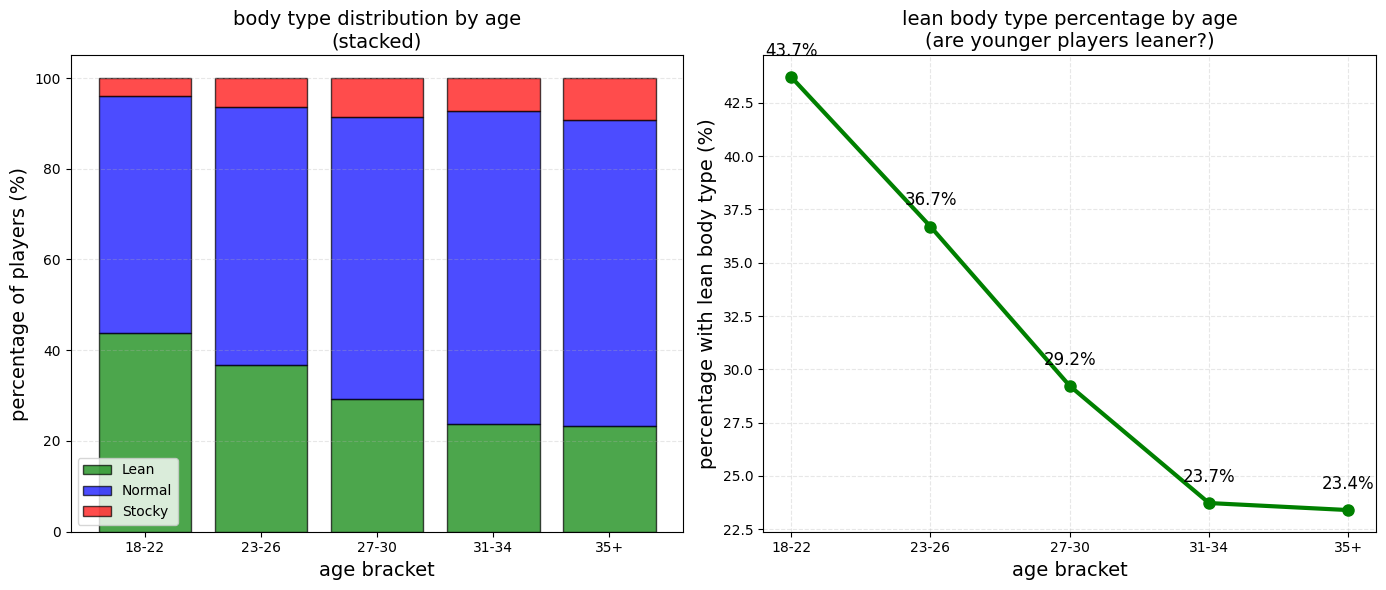

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("testing hypothesis of whether younger players are leaner than older players")
print("comparing body type distribution across age groups")

# load the final cleaned data from github
url = 'https://raw.githubusercontent.com/fern-1210/IronHack-w3-Modual1-Project3/main/Data/Clean/The%20Immaculate%20Data.csv'
df = pd.read_csv(url)

print(f"\nloaded {len(df):,} players\n")

# filter to body types only and exlcude special body types like messi etc
def is_valid_body_type(bt):
    if pd.isna(bt):
        return False
    bt = str(bt)
    return (bt.startswith('Normal') or bt.startswith('Lean') or bt.startswith('Stocky')) and '(' in bt

df_filtered = df[df['Body Type'].apply(is_valid_body_type)].copy()

print(f"analysing {len(df_filtered):,} players with valid body types")

# categorise body types into the three main groups
def categorise_body_type(bt):
    if pd.isna(bt):
        return 'Unknown'
    bt = str(bt)
    if 'Lean' in bt:
        return 'Lean'
    elif 'Stocky' in bt:
        return 'Stocky'
    elif 'Normal' in bt:
        return 'Normal'
    else:
        return 'Other'

df_filtered['Body_Type_Category'] = df_filtered['Body Type'].apply(categorise_body_type)

# create age brackets using player age in 2023
df_filtered = df_filtered[df_filtered['Age in 2023'].notna()].copy()

def create_age_bracket(age):
    if pd.isna(age):
        return 'Unknown'
    age = int(age)
    if age <= 22:
        return '18-22'
    elif age <= 26:
        return '23-26'
    elif age <= 30:
        return '27-30'
    elif age <= 34:
        return '31-34'
    else:
        return '35+'

df_filtered['Age_Bracket'] = df_filtered['Age in 2023'].apply(create_age_bracket)

print(f"\nage bracket distribution:")
print("-"*60)
age_counts = df_filtered['Age_Bracket'].value_counts().sort_index()
for bracket, count in age_counts.items():
    pct = (count / len(df_filtered)) * 100
    print(f"{bracket:10s}: {count:4d} players ({pct:5.2f}%)")

# calculate body type percentages for each age bracket
print("\n")
print("body type distribution by age bracket:")
print("-"*60)

age_brackets_ordered = ['18-22', '23-26', '27-30', '31-34', '35+']
body_type_by_age = {}

for bracket in age_brackets_ordered:
    bracket_df = df_filtered[df_filtered['Age_Bracket'] == bracket]
    if len(bracket_df) > 0:
        body_type_counts = bracket_df['Body_Type_Category'].value_counts()
        body_type_pcts = (body_type_counts / len(bracket_df) * 100).round(2)
        body_type_by_age[bracket] = body_type_pcts

        print(f"\n{bracket} years ({len(bracket_df)} players):")
        for bt in ['Lean', 'Normal', 'Stocky']:
            if bt in body_type_pcts:
                print(f"  {bt:10s}: {body_type_pcts[bt]:5.2f}%")
            else:
                print(f"  {bt:10s}:  0.00%")

# extract lean percentages for each age bracket
lean_by_age = {}
for bracket in age_brackets_ordered:
    if bracket in body_type_by_age and 'Lean' in body_type_by_age[bracket]:
        lean_by_age[bracket] = body_type_by_age[bracket]['Lean']
    else:
        lean_by_age[bracket] = 0.0

print("\n")
print("lean body type trend across age brackets:")
print("-"*60)
for bracket, pct in lean_by_age.items():
    print(f"{bracket:10s}: {pct:5.2f}%")

# test hypothesis - is there a declining trend?
youngest_lean = lean_by_age['18-22']
oldest_lean = lean_by_age['35+']
difference = youngest_lean - oldest_lean

print(f"\ncomparison:")
print(f"  youngest (18-22): {youngest_lean:.2f}%")
print(f"  oldest (35+):     {oldest_lean:.2f}%")
print(f"  difference:       {difference:+.2f} percentage points")

# check if there's a general declining trend
lean_values = [lean_by_age[b] for b in age_brackets_ordered]
declining_trend = all(lean_values[i] >= lean_values[i+1] for i in range(len(lean_values)-1))

print("\n")
print("hypothesis evaluation:")
print("-"*60)

if youngest_lean > oldest_lean:
    if declining_trend:
        print("Hypothesis is fully supported")
        print("  Younger players are leaner")
        print("  Consistently declining trend across all age brackets")
        hypothesis_result = "Hypothesis is fully supported"
    else:
        print("Supported")
        print("  Younger players (aged 18-22) are leaner than older players (35+)")
        print("  some variation in middle of player age brackets")
        hypothesis_result = "Hypothesis is supported"
else:
    print("Hypothesis is not supported")
    print(f"  Older players are leaner by {abs(difference):.2f}pp")
    hypothesis_result = "not supported"

# create some visualisations for presentation
print("\ncreating charts...")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# stacked bar chart showing all player body types by age
body_types = ['Lean', 'Normal', 'Stocky']
colours = {'Lean': 'green', 'Normal': 'blue', 'Stocky': 'red'}

bottoms = np.zeros(len(age_brackets_ordered))

for bt in body_types:
    values = []
    for bracket in age_brackets_ordered:
        if bracket in body_type_by_age and bt in body_type_by_age[bracket]:
            values.append(body_type_by_age[bracket][bt])
        else:
            values.append(0)

    ax1.bar(age_brackets_ordered, values, bottom=bottoms, label=bt,
            color=colours[bt], alpha=0.7, edgecolor='black')
    bottoms += values

ax1.set_xlabel('age bracket', fontsize=14)
ax1.set_ylabel('percentage of players (%)', fontsize=14)
ax1.set_title('body type distribution by age\n(stacked)', fontsize=14)
ax1.legend()
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# line chart showing lean percentage trend
ax2.plot(age_brackets_ordered, lean_values, marker='o', linewidth=3,
         color='green', markersize=8, label='lean %')

ax2.set_xlabel('age bracket', fontsize=14)
ax2.set_ylabel('percentage with lean body type (%)', fontsize=14)
ax2.set_title('lean body type percentage by age\n(are younger players leaner?)', fontsize=14)
ax2.grid(True, alpha=0.3, linestyle='--')

# add value labels on the line
for i, (bracket, value) in enumerate(zip(age_brackets_ordered, lean_values)):
    ax2.text(i, value + 1, f'{value:.1f}%', ha='center', fontsize=12)

plt.tight_layout()
plt.savefig('age_vs_body_type_lean_hypothesis.png', dpi=200, bbox_inches='tight')
print("saved: age_vs_body_type_lean_hypothesis.png")

# additional analysis of stocky trend related to age
stocky_by_age = {}
for bracket in age_brackets_ordered:
    if bracket in body_type_by_age and 'Stocky' in body_type_by_age[bracket]:
        stocky_by_age[bracket] = body_type_by_age[bracket]['Stocky']
    else:
        stocky_by_age[bracket] = 0.0

print("\n")
print("Extra analysis - stocky body type trend:")
print("-"*60)
for bracket, pct in stocky_by_age.items():
    print(f"{bracket:10s}: {pct:5.2f}%")

youngest_stocky = stocky_by_age['18-22']
oldest_stocky = stocky_by_age['35+']

print(f"\nstocky comparison:")
print(f"  youngest (18-22): {youngest_stocky:.2f}%")
print(f"  oldest (35+):     {oldest_stocky:.2f}%")

if youngest_stocky < oldest_stocky:
    print(f"  Older players are more stocky by {oldest_stocky - youngest_stocky:.2f}pp")

# final body type summary
print("\n")
print("conclusion:")
print("="*60)

print(f"\nanalysed {len(df_filtered):,} players across 5 age brackets")
print(f"\nlean body type percentages:")
for bracket in age_brackets_ordered:
    print(f"  {bracket}: {lean_by_age[bracket]:.2f}%")

if hypothesis_result == "fully supported":
    print("\nhypothesis fully supported - younger players are consistently leaner")
    print("clear trend showing lean percentage decreases with age")
elif hypothesis_result == "supported":
    print("\nhypothesis supported. Data shows youngest players are leaner than oldest")
else:
    print("\nhypothesis not supported as there is no evidence younger players are leaner")

print("\ndone")